In [1]:
#Step 0 : 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier

#로지스틱 회귀분석
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

#분류SVM
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import matplotlib.font_manager as fm

fm._rebuild()

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')


# 데이터 불러오기

In [2]:
df_raw = pd.read_csv("SCALE불량.csv", engine = 'python',encoding = 'cp949')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


사전적정의   
후판 : 열간압연 강판으로 두께가 6mm이상인 것  
박판 : 3mm이하인 강판

In [3]:
df_raw.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [4]:
df_raw.dtypes

PLATE_NO              object
ROLLING_DATE          object
SCALE                 object
SPEC                  object
STEEL_KIND            object
PT_THK               float64
PT_WDTH                int64
PT_LTH                 int64
PT_WGT                 int64
FUR_NO                object
FUR_NO_ROW             int64
FUR_HZ_TEMP            int64
FUR_HZ_TIME            int64
FUR_SZ_TEMP            int64
FUR_SZ_TIME            int64
FUR_TIME               int64
FUR_EXTEMP             int64
ROLLING_TEMP_T5        int64
HSB                   object
ROLLING_DESCALING      int64
WORK_GR               object
dtype: object

In [5]:
df_raw.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

양품 : 0, 불량 :1

In [6]:
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


In [7]:
# df_raw["SCALE"] = np.where(df_raw["SCALE"] == "양품", 0, 1)
# df_raw["SCALE"]

In [8]:
# (df_raw.SCALE ==1).sum()

#총 720개중 231개의 불량 존재 

In [9]:
# df_raw["HSB"] = np.where(df_raw["HSB"] == "적용", 0, 1)
# df_raw["HSB"]

In [10]:
# (df_raw.HSB ==1).sum()
# # HSB 의 갯수 33개  

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\bac

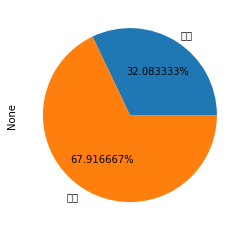

In [11]:
df_count = df_raw.groupby(["SCALE"]).size()
df_count.plot.pie(y="SCALE", autopct="%1f%%")
#불량률은 약 32% 양품은 약 68%

# 히스토그램

In [12]:
def fun_plot_hist(data, var):
    plt.hist(data[data['SCALE'] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data['SCALE'] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()

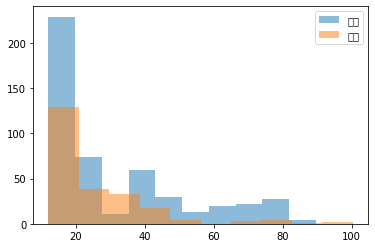

In [13]:
# Plate 두께
fun_plot_hist(df_raw, "PT_THK")

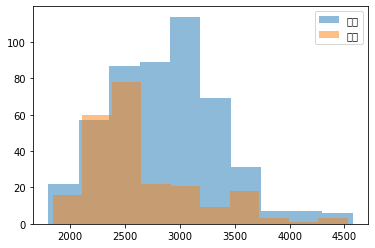

In [14]:
# Plate 폭
fun_plot_hist(df_raw, "PT_WDTH")

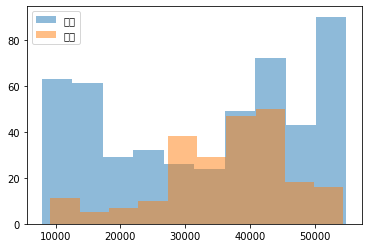

In [15]:
# Plate 길이
fun_plot_hist(df_raw, "PT_LTH")

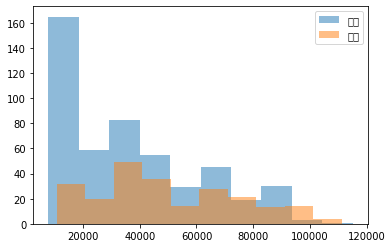

In [16]:
# Plate 중량
fun_plot_hist(df_raw, "PT_WGT")

Plate의 중량이 작을 수록 양품과 불량품이 많은 경향성을 보이고 있다. 따라서 Plate의 중량은 양품/불량과의 영향이 있는 지 알 수 없다.

플레이트의 중량에 따라 scale 불량의 비율이 큰 차이가 없는 것 
    으로 보아 두 변수간의 상관이 적다고 생각할 수 있다.

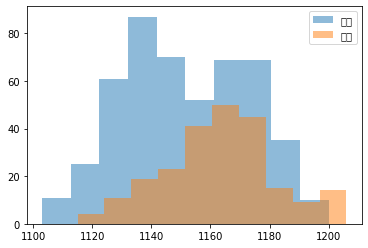

In [17]:
# 가열로 가열대 온도
fun_plot_hist(df_raw, "FUR_HZ_TEMP")

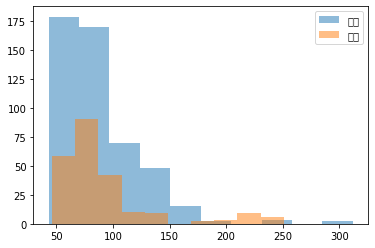

In [18]:
# 가열로 가열대 시간
fun_plot_hist(df_raw, "FUR_HZ_TIME")

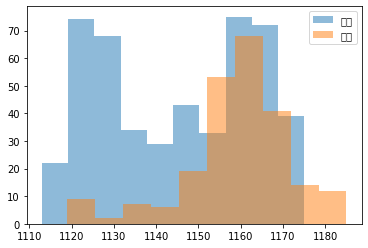

In [19]:
# 가열로 균열대 온도
fun_plot_hist(df_raw, "FUR_SZ_TEMP")

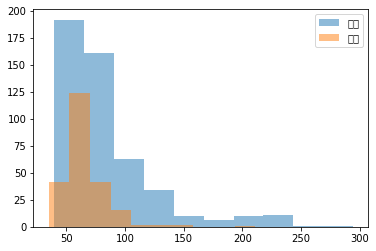

In [20]:
# 가열로 균열대 시간
fun_plot_hist(df_raw, "FUR_SZ_TIME")

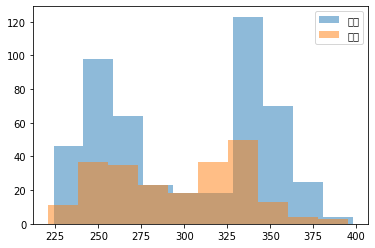

In [21]:
# 가열로 시간
fun_plot_hist(df_raw, "FUR_TIME")

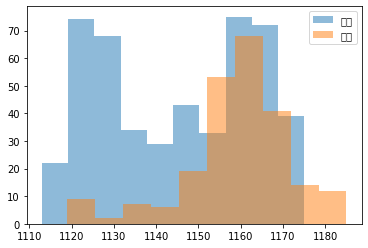

In [22]:
# 추출온도
fun_plot_hist(df_raw, "FUR_EXTEMP")

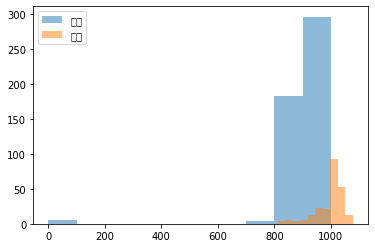

In [23]:
# 압연온도
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

In [24]:
df_raw = df_raw[df_raw.ROLLING_TEMP_T5 > 600]

#이상치 제거 

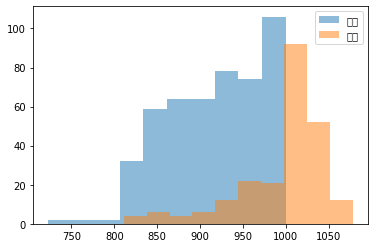

In [25]:
#압연온도
fun_plot_hist(df_raw, "ROLLING_TEMP_T5")

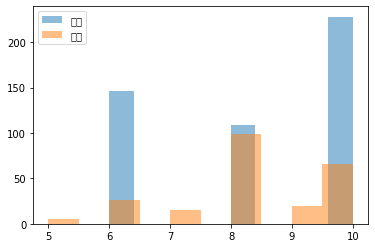

In [26]:
# 압연 중 Descaling 횟수
fun_plot_hist(df_raw, "ROLLING_DESCALING")

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48120 missing from current fon

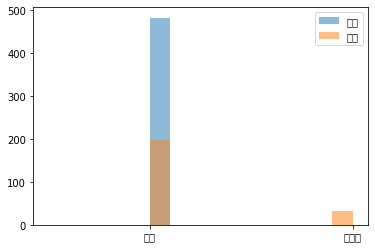

In [27]:
fun_plot_hist(df_raw,"HSB")

# 교차분석

In [28]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index = data["SCALE"], columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"],columns = data[var], 
                      normalize ="columns").round(3))

In [29]:
# 가열로 호기
fun_print_crosstab(df_raw, "FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
불량       73   70   88
양품      166  166  151

FUR_NO    1호기    2호기    3호기
SCALE                      
불량      0.305  0.297  0.368
양품      0.695  0.703  0.632


가열로 호기의 각 데이터 양이 유사하다.

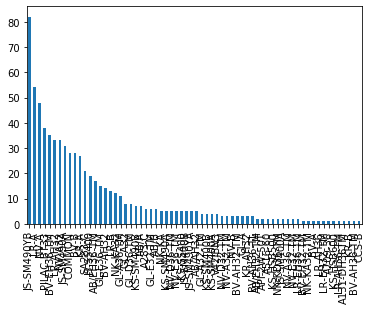

In [30]:
# 제품 규격
df_count = df_raw["SPEC"].value_counts()
df_count.plot.bar()

In [31]:
# 강종
fun_print_crosstab(df_raw, "STEEL_KIND")

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
불량          212   1   1   2   2   0   2   6   5
양품          289   0   6  13  16   2  39  29  89

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
불량          0.423  1.0  0.143  0.133  0.111  0.0  0.049  0.171  0.053
양품          0.577  0.0  0.857  0.867  0.889  1.0  0.951  0.829  0.947


In [32]:
# 가열로 작업순번
fun_print_crosstab(df_raw, "FUR_NO_ROW")

FUR_NO_ROW    1    2
SCALE               
불량          120  111
양품          239  244

FUR_NO_ROW      1      2
SCALE                   
불량          0.334  0.313
양품          0.666  0.687


In [33]:
# Hot Scale Braker
fun_print_crosstab(df_raw, "HSB")

HSB    미적용   적용
SCALE          
불량      33  198
양품       0  483

HSB    미적용     적용
SCALE            
불량     1.0  0.291
양품     0.0  0.709


In [34]:
# 작업조
fun_print_crosstab(df_raw, "WORK_GR")   

WORK_GR   1조   2조   3조   4조
SCALE                      
불량        67   45   54   65
양품       121  119  115  128

WORK_GR     1조     2조    3조     4조
SCALE                             
불량       0.356  0.274  0.32  0.337
양품       0.644  0.726  0.68  0.663


# 이상치, 결측치 제거

In [35]:
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

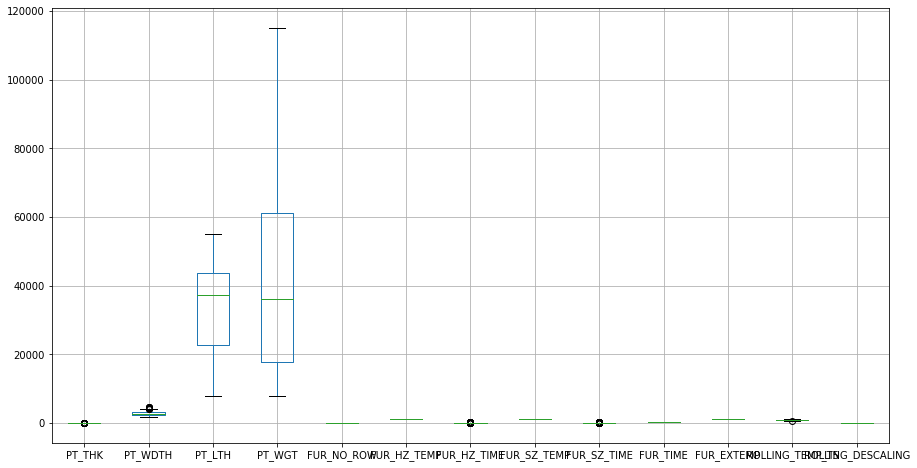

In [36]:
df_raw.boxplot(figsize=(15,8))

findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\b

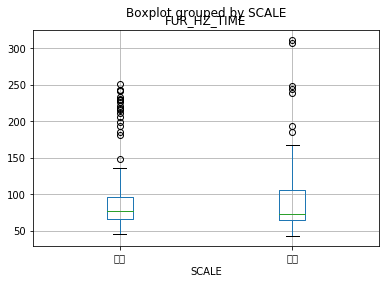

In [37]:
FUR_HZ_TIME = df_raw["FUR_HZ_TIME"]
df_raw.boxplot(column = "FUR_HZ_TIME", by = "SCALE")

In [38]:
df_raw[["FUR_HZ_TIME"]]>300

,FUR_HZ_TIME
0,False
1,False
2,False
3,False
4,False
...,...
715,False
716,False
717,False
718,False


In [39]:
len(df_raw[df_raw["FUR_HZ_TIME"] > 300])

2

botplot을 통해서 가열로 가열대 시간(FUR_HZ_TIME)이 300 이상일 경우가 2개 밖에 존재하지 않는다. 따라서 300 인 가열로 가열대 시간의 값을 이상치로 규정하고 데이터를 제거한다.

In [40]:
df_raw = df_raw[df_raw["FUR_HZ_TIME"] < 300]

In [41]:
df_raw.reset_index(drop=True, inplace =True)
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,PB563502,2008-08-02:13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
708,PB563503,2008-08-02:13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
709,PB563504,2008-08-02:14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
710,PB563505,2008-08-02:13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


# 데이터 분할

In [42]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE","PLATE_NO", "ROLLING_DATE"], axis = 1, inplace = False)

In [43]:
# df_raw_x = df_raw.drop(["SCALE","PT_LTH","FUR_NO_ROW", "ROLLING_DATE", "FUR_SZ_TIME", 
#                          ,"WORK_GR","PLATE_NO",], axis = 1, inplace = False)

In [44]:
#scale을 0과 1의 값을 가진 int형으로 변환
print(df_raw_y.value_counts())
df_raw_y = (df_raw_y == "불량").astype(int)
print(df_raw_y.value_counts())

양품    481
불량    231
Name: SCALE, dtype: int64
0    481
1    231
Name: SCALE, dtype: int64


# 의사결정나무

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')

In [46]:
df_raw_x_dummy = pd.get_dummies(df_raw_x)
df_raw_x_dummy.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,1,0,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,1,0,0,0,1,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,1,0,1,0,0,1,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,1,0,0,1,0,1,1,0,0,0


In [47]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x_dummy, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)

df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y,
                                                               test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (284, 97)
train data Y size : (284,)
test data X size : (214, 97)
test data Y size : (214,)
validation data X size : (214, 97)
validation data Y size : (214,)


In [48]:
tree_uncustomized = DTC(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))


Score on training set: 1.000
Score on training set: 0.949


train set에 대해 과대적합

In [49]:
#max_depth: 최대깊이 변경에 따른 모델 성능

train_accuracy = []
test_accuracy =[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DTC(max_depth = v_max_depth, random_state= 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x, df_val_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.901,0.869
1,2,0.944,0.921
2,3,0.972,0.958
3,4,0.982,0.967
4,5,0.986,0.963
5,6,0.986,0.963
6,7,0.989,0.963
7,8,0.993,0.958
8,9,0.996,0.958
9,10,0.996,0.958


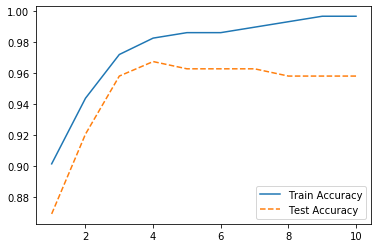

In [50]:
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가한다. 최대 깊이를 4로 지정

In [51]:
#변수명 저장
v_feature_name = df_train_x.columns

In [ ]:
# def plot_decision_regions(x, y, model, title):
#     resolution = 0.01
#     markers = ('s', '^', 'o')
#     colors = ('red', 'blue', 'lightgreen')
#     cmap = mpl.colors.ListedColormap(colors)

#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = model.predict(
#         np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

#     plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())

#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
#                     c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

#     plt.xlabel(data.feature_names[2])
#     plt.ylabel(data.feature_names[3])
#     plt.legend(loc='upper left')
#     plt.title(title)

#     return Z

In [ ]:
# plot_decision_regions(df_train_x, df_train_y, dot_graph, "tree_low.dot")
# plt.show()

In [53]:
#깊이가 3인 모델
tree_low = DTC(random_state = 1234, max_depth = 5)
tree_low.fit(df_train_x,df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["good", "bad"],
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 204: illegal multibyte sequence

In [ ]:
#깊이가 3인 모델
tree_low = DTC(random_state = 1234, max_depth = 6)
tree_low.fit(df_train_x,df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["good", "bad"],
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [54]:
train_accuracy = []
test_accuracy =[]
para_split = [n_split * 2 for n_split in range(1,11)]
#para_split = [n_split * 5 for n_split in range(1,11)]
#para_split = [n_split * 10 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DTC(random_state = 1234, max_depth = 4,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.982,0.967
1,4,0.982,0.967
2,6,0.982,0.967
3,8,0.982,0.967
4,10,0.982,0.967
5,12,0.982,0.967
6,14,0.982,0.967
7,16,0.982,0.967
8,18,0.982,0.967
9,20,0.982,0.967


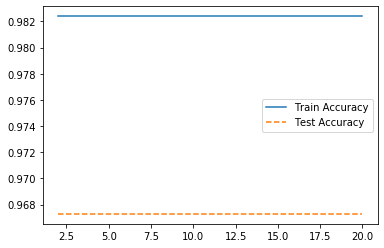

In [55]:
plt.plot(para_split, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

분리노드의 최소 자료수는 영향을 미치지 않는다. min_samples_split 지정하지 않는다.
분리노드 최소자료 수 증가에 따라 모델의 정확도 감소

In [56]:
train_accuracy = []
test_accuracy =[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DTC(random_state = 1234, min_samples_leaf = v_min_samples_leaf, max_depth=4)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_accuracy
df_score_leaf["TestScore"] = test_accuracy
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.982,0.967
1,4,0.972,0.958
2,6,0.972,0.958
3,8,0.972,0.958
4,10,0.961,0.958
5,12,0.954,0.953
6,14,0.915,0.902
7,16,0.905,0.893
8,18,0.901,0.869
9,20,0.901,0.869


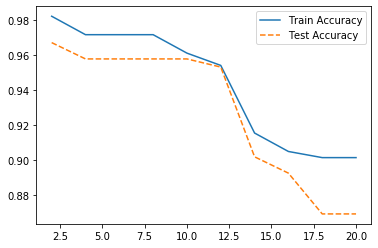

In [57]:
plt.plot(para_leaf, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소한다. 이전의 나무를 비교하면, 기준에 따라 양품과 불량이 구분되므로 min_samples_leaf = 1로 디폴트 값이 가장 효율적이라는 것을 알 수 있다.

In [58]:
#최종모델
tree_final = DTC(random_state = 1234, max_depth = 4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [59]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 204: illegal multibyte sequence

In [60]:
y_pred = tree_final.predict(df_test_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x,df_train_y)), end ="")
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix56: \n{}".format(confusion_matrix(df_test_y,y_pred)))

Train Accuracy: 0.982
Test Accuracy: 0.953

Confusion matrix56: 
[[144   0]
 [ 10  60]]


정분류율은 95%이지만 우리가 관심있는 불량에 대한 정확도가 낮다.

In [61]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:7]
df_importance7.round(4)

,Feature,Importance
11,ROLLING_TEMP_T5,0.6513
92,HSB_적용,0.1724
10,FUR_EXTEMP,0.1263
12,ROLLING_DESCALING,0.0500
0,PT_THK,0.0000
62,SPEC_LR-EH36-TM,0.0000
71,SPEC_NV-B,0.0000


ROLLING_TEMP_T5(압연온도), HSB_적용(hot scale break), FUR_EXTEMP(추출온도),ROLLING_DESCALING(압연중 Descaling횟수) 순으로 중요하다.

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Variable')

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)


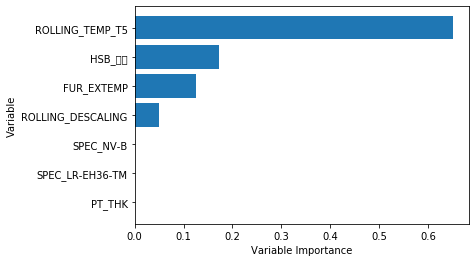

In [62]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

중요 설명 변수: ROLLING_TEMP_T5, HSB_적용, FUR_EXTEMP, ROLLING_DESCALING	

### 의사결정나무 GridSearchCV

In [63]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeClassifier

In [64]:
# GridSearchCV 이용한 DecisionTreeClassifier 최적의 파라미터 찾기
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" :para_depth, "min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt =GridSearchCV(estimator, param_grid,scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest paramator model :\n{}".format(grid_dt.best_params_))
print("\nbest score :\n{}".format(grid_dt.best_score_.round(3)))

best estimator model :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

best paramator model :
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score :
0.975


# 랜덤 포레스트

In [65]:
df_raw_x=df_raw.drop("SCALE",axis=1,inplace=False)
df_raw_y=df_raw["SCALE"]

In [66]:
#step1 : 데이터 구성하기
#더미변수 생성
df_raw_x_dummy = pd.get_dummies(df_raw_x)
df_raw_x_dummy.head()
df_raw_x=df_raw_x_dummy

In [67]:
#scale을 0과 1의 값을 가진 in형으로 변환
df_raw_y = (df_raw_y == "불량").astype(int)
df_raw_y.head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int32

In [68]:
df_raw_y

0      0
1      0
2      0
3      0
4      0
      ..
707    1
708    0
709    0
710    0
711    0
Name: SCALE, Length: 712, dtype: int32

In [69]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x,df_raw_y
                                                             ,test_size=0.3,random_state=1234)
df_train_x, df_val_x, df_train_y, df_val_y=train_test_split(df_train_x,df_train_y
                                                             ,test_size=3/7,random_state=1234)




print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (284, 1506)
train data Y size : (284,)
val data X size : (214, 1506)
val data Y size : (214,)
test data X size : (214, 1506)
test data Y size : (214,)


In [70]:
#step2 : 모델 생성

rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:1.000
Accuracy on val set:0.893


In [71]:
#n_estimators 트리수 변경에 따른 모델 성능

train_accuracy = []; val_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]
 
for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state=1234, 
                                  n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["ValAccuracy"] = val_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValAccuracy
0,10,0.996,0.897
1,20,1.000,0.930
2,30,1.000,0.911
3,40,1.000,0.907
4,50,1.000,0.893
5,60,1.000,0.907
6,70,1.000,0.911
7,80,1.000,0.897
8,90,1.000,0.902
9,100,1.000,0.911


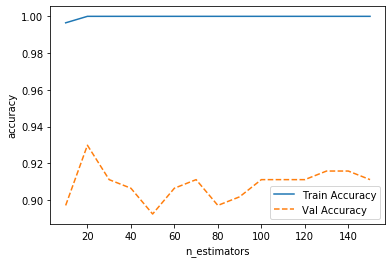

In [72]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('n_estimators');plt.ylabel('accuracy')
plt.legend()

In [73]:
#error 저장 리스트

oob_error = []

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators = v_n_estimator, 
                             oob_score = True, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1 - rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably me

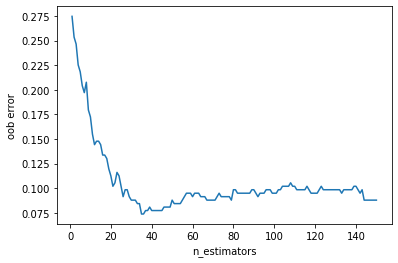

In [74]:
#그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')
#트리 수 지정
n_estimators = 35

In [75]:
#max_depth
#train 및 test 정확도 결과 저장용
train_accuracy = []; val_accuracy = []

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,30)]
 
for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, n_estimators = 35, 
                                  max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValAccuracy"] = val_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValAccuracy
0,1,0.687,0.664
1,2,0.687,0.664
2,3,0.743,0.692
3,4,0.775,0.710
4,5,0.863,0.776
5,6,0.877,0.794
6,7,0.905,0.855
7,8,0.915,0.850
8,9,0.937,0.879
9,10,0.954,0.869


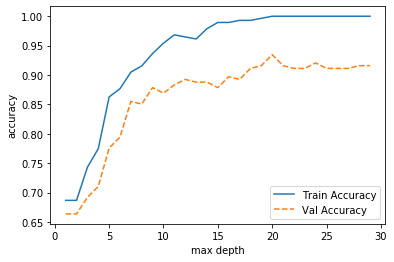

In [76]:
#모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('max depth'); plt.ylabel('accuracy')
plt.legend()

#최대 깊이 지정
max_depth = 20

In [77]:
#min_samples_split
train_accuracy = []; val_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]
 
for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                                  max_depth = 20, n_estimators= 40, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuacy"] = train_accuracy
df_accuracy_split["ValAccuacy"] = val_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuacy,ValAccuacy
0,10,0.979,0.874
1,20,0.975,0.902
2,30,0.961,0.888
3,40,0.958,0.883
4,50,0.944,0.869
5,60,0.947,0.893
6,70,0.919,0.860
7,80,0.908,0.836
8,90,0.901,0.836
9,100,0.884,0.794


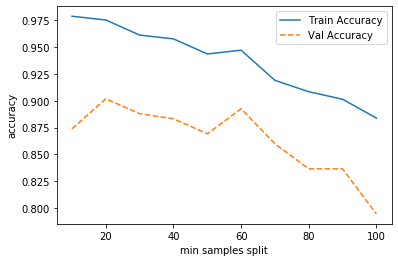

In [78]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, val_accuracy, linestyle="--", label="Val Accuracy")
plt.xlabel('min samples split'); plt.ylabel('accuracy')
plt.legend()

In [79]:
#min_samples_leaf
train_accuracy = []; val_accuracy = []
para_leaf = [n_leaf for n_leaf in range(1,11)]
 
for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf,
                    max_depth = 20, n_estimators = 35, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    val_accuracy.append(rf.score(df_val_x, df_val_y))

    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValAccuracy"] = val_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValAccuracy
0,1,1.000,0.935
1,2,0.687,0.664
2,3,0.687,0.664
3,4,0.687,0.664
4,5,0.687,0.664
5,6,0.687,0.664
6,7,0.687,0.664
7,8,0.687,0.664
8,9,0.687,0.664
9,10,0.687,0.664


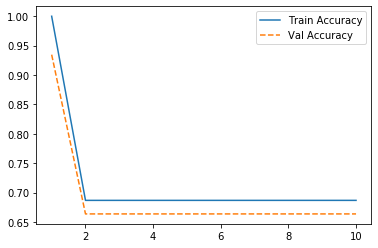

In [80]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, val_accuracy, linestyle="--", label="Val Accuracy")
plt.legend()

In [88]:
#결론 도출
#최종 모델 선택
rf_final = RandomForestClassifier(min_samples_leaf = 1, max_depth = 20, n_estimators = 35, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)
#평가
y_pred = rf_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))
#train 데이터 셋 정확도
print("Accuracy:on test set:{:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:0.911
Accuracy:on test set:0.911

Confusion matrix:
[[142   2]
 [ 17  53]]


In [89]:
#변수명
v_feature_name = df_train_x.columns
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_
#df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance10 = df_importance[:10]
df_importance10.round(3)

,Feature,Importance
11,ROLLING_TEMP_T5,0.125
0,PT_THK,0.061
10,FUR_EXTEMP,0.058
5,FUR_HZ_TEMP,0.049
7,FUR_SZ_TEMP,0.039
9,FUR_TIME,0.039
2,PT_LTH,0.037
1,PT_WDTH,0.033
1500,HSB_미적용,0.032
1451,SPEC_JS-SM490A,0.031


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '변수')

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from current

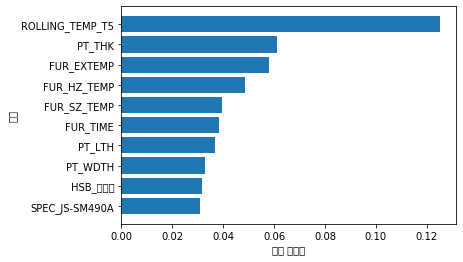

In [90]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance10.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance10))
plt.barh(y = coordinates, width = df_importance10["Importance"])
plt.yticks(coordinates, df_importance10["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 그래디언트 부스팅

In [91]:
df_raw_x=df_raw.drop("SCALE",axis=1,inplace=False)
df_raw_y=df_raw["SCALE"]

df_raw_y

0      양품
1      양품
2      양품
3      양품
4      양품
       ..
707    불량
708    양품
709    양품
710    양품
711    양품
Name: SCALE, Length: 712, dtype: object

In [92]:
df_raw_dummy=pd.get_dummies(df_raw_x)
df_raw_dummy.head() # 데이터의 문자형 변수에 대한 더미변수 생성

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,1,0,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,1,0,0,0,1,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,1,0,1,0,0,1,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,1,0,0,1,0,1,1,0,0,0


In [93]:
df_raw_x=df_raw_dummy

df_raw_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,1,0,0,0,1,0,1,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,1,0,0,0,1,0,1,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,1,0,1,0,0,1,0,0,1,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,1,0,1,0,0,1,0,0,1,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,1,0,0,1,0,1,1,0,0,0


In [94]:
#scale을 0과 1의 값을 가진 int형으로 변환
print(df_raw_y.value_counts())
df_raw_y = (df_raw_y == "불량").astype(int)
print(df_raw_y.value_counts())

양품    481
불량    231
Name: SCALE, dtype: int64
0    481
1    231
Name: SCALE, dtype: int64


In [95]:
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x,df_raw_y \
                                                             ,test_size=0.3,random_state=1234)
df_train_x, df_val_x, df_train_y, df_val_y=train_test_split(df_train_x,df_train_y \
                                                             ,test_size=3/7,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))

print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (284, 1506)
train data Y size : (284,)
validation data X size : (214, 1506)
validation data Y size : (214,)
test data X size : (214, 1506)
test data Y size : (214,)


In [96]:
#모델생성
gb_uncustomized=GBC(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))

print("Accuracy on test set : {:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.953


In [97]:
train_accuracy=[]
val_accuracy=[]


para_lr=[lr*0.1 for lr in range(1,10)]


for v_learning_rate in para_lr:
    
    gb=GBC(learning_rate=v_learning_rate, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr["LearningRate"]=para_lr
df_accuracy_lr["TrainAccuracy"]=train_accuracy
df_accuracy_lr["valAccuracy"]=val_accuracy
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,valAccuracy
0,0.1,1.0,0.967
1,0.2,1.0,0.967
2,0.3,1.0,0.967
3,0.4,1.0,0.967
4,0.5,1.0,0.967
5,0.6,1.0,0.967
6,0.7,1.0,0.967
7,0.8,1.0,0.967
8,0.9,1.0,0.967


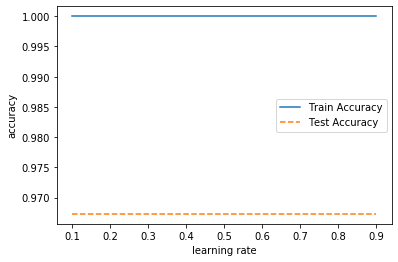

In [98]:
plt.plot(para_lr,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_lr,val_accuracy,linestyle="--",label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.legend()

In [99]:
train_accuracy=[]
val_accuracy=[]


para_n_tree=[n_tree*10 for n_tree in range(1,16)]


for v_n_estimators in para_n_tree:
    
    gb=GBC(n_estimators=v_n_estimators, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["valAccuracy"]=val_accuracy
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,valAccuracy
0,10,0.972,0.593
1,20,0.982,0.593
2,30,0.982,0.593
3,40,1.000,0.593
4,50,1.000,0.593
5,60,1.000,0.593
6,70,1.000,0.593
7,80,1.000,0.593
8,90,1.000,0.593
9,100,1.000,0.593


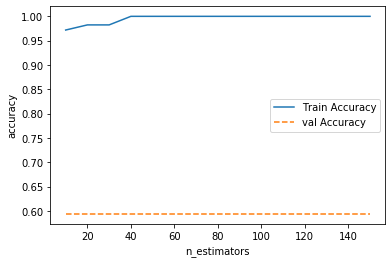

In [100]:
plt.plot(para_n_tree, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_n_tree, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [101]:
train_accuracy=[]
val_accuracy=[]


para_depth=[depth for depth in range(1,11)]


for v_max_depth in para_depth:
    
    gb=GBC(max_depth=v_max_depth, n_estimators=40, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["valAccuracy"]=val_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,valAccuracy
0,1,0.972,0.958
1,2,0.982,0.967
2,3,1.000,0.967
3,4,1.000,0.967
4,5,1.000,0.967
5,6,1.000,0.967
6,7,1.000,0.967
7,8,1.000,0.967
8,9,1.000,0.967
9,10,1.000,0.967


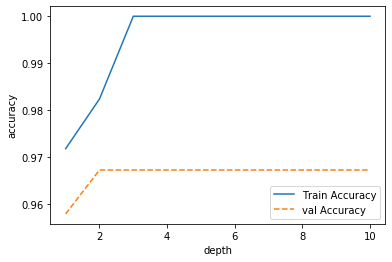

In [102]:
plt.plot(para_depth, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_depth, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("depth")
plt.legend()

In [103]:
train_accuracy=[]
val_accuracy=[]


para_split=[n_split*10 for n_split in range(2,11)]


for v_min_samples_split in para_split:
    
    gb=GBC(min_samples_split=v_min_samples_split, max_depth=2, n_estimators=40, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["valAccuracy"]=val_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,valAccuracy
0,20,0.982,0.967
1,30,0.982,0.967
2,40,0.982,0.967
3,50,0.982,0.967
4,60,0.982,0.967
5,70,0.982,0.967
6,80,0.982,0.967
7,90,0.982,0.967
8,100,0.982,0.967


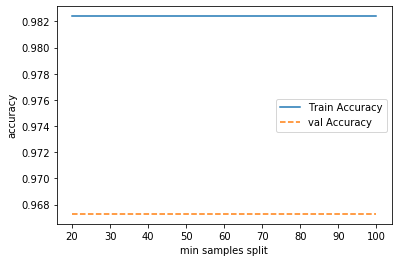

In [104]:
plt.plot(para_split, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_split, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples split")
plt.legend()

In [105]:
train_accuracy=[]
val_accuracy=[]


para_leaf=[n_leaf for n_leaf in range(1,11)]


for v_min_samples_leaf in para_leaf:
    
    gb=GBC(min_samples_leaf=v_min_samples_leaf, max_depth=2, n_estimators=40, min_samples_split=30, learning_rate=0.1, random_state=1234)
    
    gb.fit(df_train_x,df_train_y)
    
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    val_accuracy.append(gb.score(df_val_x,df_val_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesSplit"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["valAccuracy"]=val_accuracy
df_accuracy_leaf.round(3)

,MinSamplesSplit,TrainAccuracy,valAccuracy
0,1,0.982,0.967
1,2,0.982,0.967
2,3,0.982,0.967
3,4,0.972,0.958
4,5,0.972,0.958
5,6,0.972,0.958
6,7,0.972,0.958
7,8,0.972,0.958
8,9,0.972,0.958
9,10,0.972,0.958


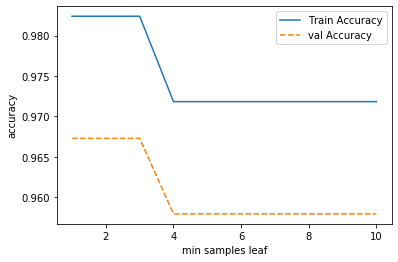

In [106]:
plt.plot(para_leaf, train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_leaf, val_accuracy,linestyle="--",label="val Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min samples leaf")
plt.legend()

In [107]:
gb_final=GBC(min_samples_leaf= 2,max_depth=6,n_estimators=100,min_samples_split=20,
                                   learning_rate=0.1,random_state=1234)
gb_final.fit(df_train_x,df_train_y)

y_pred=gb_final.predict(df_test_x)

#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(gb_final.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(gb_final.score(df_test_x,df_test_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:1.000
Accuracy on test set:0.963
Confusion matrix:
[[144   0]
 [  8  62]]


In [108]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance7 = df_importance[:7]
df_importance7.round(3)[:10]

,Feature,Importance
11,ROLLING_TEMP_T5,0.603
1501,HSB_적용,0.110
12,ROLLING_DESCALING,0.071
10,FUR_EXTEMP,0.071
1500,HSB_미적용,0.049
7,FUR_SZ_TEMP,0.047
0,PT_THK,0.017


C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '변수')

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from current

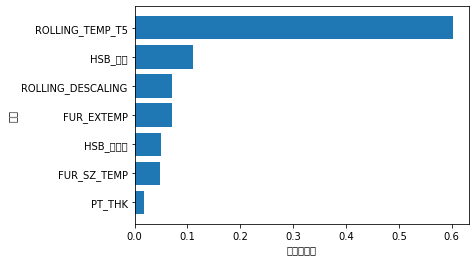

In [109]:
df_importance7.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance7))
plt.barh(y=coordinates,width=df_importance7["Importance"])
plt.yticks(coordinates,df_importance7["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# 서포트 벡터 머신

In [111]:
df_raw = pd.read_csv("SCALE불량.csv", engine = 'python',encoding = 'cp949')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [112]:
df_raw = df_raw.drop(['PLATE_NO'], axis =1)
df_raw = df_raw.drop(['ROLLING_DATE'], axis =1)

In [113]:
df_raw = df_raw[df_raw["FUR_HZ_TIME"] < 300]

In [114]:
df_raw = df_raw[df_raw.ROLLING_TEMP_T5 > 600]

In [115]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop(["SCALE"], axis = 1, inplace = False)

df_char = df_raw_x.select_dtypes(include = "object")
df_numeric = df_raw_x.select_dtypes(exclude = "object")

df_char.reset_index(drop=True, inplace=True)

In [116]:
df_char.head()

,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,AB/EH32-TM,T1,1호기,적용,2조
1,AB/EH32-TM,T1,1호기,적용,2조
2,NV-E36-TM,T8,2호기,적용,3조
3,NV-E36-TM,T8,2호기,적용,3조
4,BV-EH36-TM,T8,3호기,적용,1조


In [117]:
df_char = pd.get_dummies(df_char)
df_char.head()

,SPEC_A131-DH36TM,SPEC_A283-C,SPEC_A516-60,SPEC_A709-36,SPEC_AB/A,SPEC_AB/AH32,SPEC_AB/B,SPEC_AB/EH32-TM,SPEC_AB/EH36-TM,SPEC_API-2W-50T,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0


In [118]:
df_numeric.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1133,934,8
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,1135,937,8
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,1121,889,8
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,1127,885,8
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,1128,873,8


In [119]:
df_raw_x

,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


In [120]:
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()
df_scaled

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,HSB_미적용,HSB_적용,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.163677,1.737667,-1.396597,-1.100508,-0.997195,-0.551885,0.780852,-0.957807,-0.545175,-0.399029,...,0,1,0,0,0,1,0,1,0,0
1,0.163677,1.737667,-1.396597,-1.100508,1.002813,-0.551885,0.947826,-0.843653,-0.709246,-0.376942,...,0,1,0,0,0,1,0,1,0,0
2,0.217366,1.567297,-1.101221,-0.941291,-0.997195,-1.271558,0.780852,-1.642734,-0.654556,-0.399029,...,1,0,1,0,0,1,0,0,1,0
3,0.217366,1.567297,-1.101221,-0.941291,1.002813,-0.168059,1.031313,-1.300270,-0.299068,0.351939,...,1,0,1,0,0,1,0,0,1,0
4,0.483704,0.558629,-1.525352,-1.171047,-0.997195,-0.743798,1.281773,-1.243193,-0.845972,0.307764,...,1,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.473746,1.491792,0.310228,-0.790538,-0.997195,0.791506,-0.443622,0.811587,-0.463139,-1.216260,...,0,0,0,1,0,1,0,1,0,0
708,-0.740084,0.779336,1.006160,-0.932826,-0.997195,-0.264015,-0.749740,1.096973,-0.490485,-1.370871,...,0,0,1,0,0,1,1,0,0,0
709,-0.660077,1.222685,0.676473,-0.882441,1.002813,0.647572,-0.638424,0.754509,-0.052962,-1.172085,...,0,0,1,0,0,1,0,0,0,1
710,-0.713240,1.071675,1.042936,1.562252,1.002813,1.127354,-0.054016,0.754509,-0.928007,-1.260434,...,0,0,0,1,0,1,0,1,0,0


In [121]:
#scale을 0과 1의 값을 가진 int형으로 변환
df_raw_y = (df_raw_y == "불량").astype(int)
df_raw_y.head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int32

In [122]:
df_raw_y

0      0
1      0
2      0
3      0
4      0
      ..
715    1
716    0
717    0
718    0
719    0
Name: SCALE, Length: 712, dtype: int32

In [123]:
df_train_x, df_test_x, df_train_y, df_test_y =train_test_split(df_scaled, df_raw_y, test_size=0.3, random_state=1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (284, 97)
train data Y size : (284,)
val data X size : (214, 97)
val data Y size : (214,)
test data X size : (214, 97)
test data Y size : (214,)


In [124]:
#SCV모델 생성
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.912
Accuracy on test set:0.869


In [125]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
#C; 규제에 대한 강도 변경
train_accuracy =[]; val_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
# para_c=[0.1 * c for c in range(1,10)]
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValAccuracy"]=val_accuracy

#C별 정확도
df_accuracy_c.round(3)

,C,TrainAccuracy,ValAccuracy
0,0.01,0.687,0.664
1,0.10,0.697,0.678
2,1.00,0.912,0.836
3,10.00,1.000,0.860


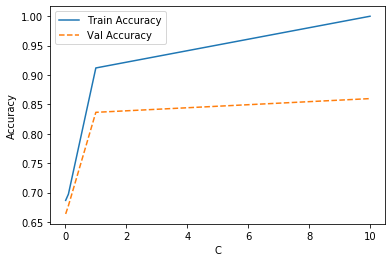

In [127]:
#C별 정확도 그래프로 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,val_accuracy,linestyle="--",label="Val Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("C")
plt.legend()

In [128]:
#Gamma: 훈련 샘플이 미치는 영향의 범위를 변경
train_accuracy =[]; val_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=10 ,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))
#데이터 테이블로 저장 
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["ValAccuracy"]=val_accuracy

In [129]:
#gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValAccuracy
0,0.01,0.905,0.869
1,0.10,1.000,0.869
2,1.00,1.000,0.668
3,10.00,1.000,0.664


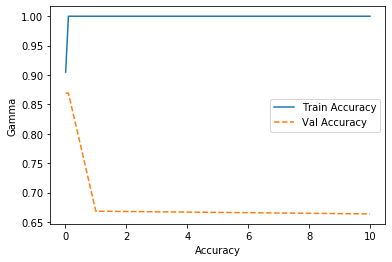

In [130]:
#Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,val_accuracy,linestyle="--",label="Val Accuracy")
plt.xlabel("Accuracy"); plt.ylabel("Gamma")
plt.legend()

In [131]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3,
                                                     random_state = 1234)
df_scaled_train_x, df_scaled_val_x = train_test_split(df_scaled_train_x, test_size = 3/7,
                                                     random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("val data X size : {}".format(df_scaled_val_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size : (284, 97)
val data X size : (214, 97)
test data X size:(214, 97)


In [132]:
# scale 조절 후 SVC 모델 재실행

svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on val set:{:.3f}".format(svm_scaled.score(df_scaled_val_x, df_val_y)))

Accuracy on training set:0.912
Accuracy on val set:0.836


In [133]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; val_accuracy = []
# c: 규제(0.01, 0..1, 1, 10)
para_c = [0.1 * c for c in range(1, 31)]
# para_c = [10 ** c for c in range(-2, 2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x, df_val_y))
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["ValAccuracy"] = val_accuracy

# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,ValAccuracy
0,0.1,0.697,0.678
1,0.2,0.852,0.822
2,0.3,0.849,0.822
3,0.4,0.856,0.827
4,0.5,0.866,0.822
5,0.6,0.884,0.827
6,0.7,0.887,0.836
7,0.8,0.894,0.836
8,0.9,0.905,0.836
9,1.0,0.912,0.836


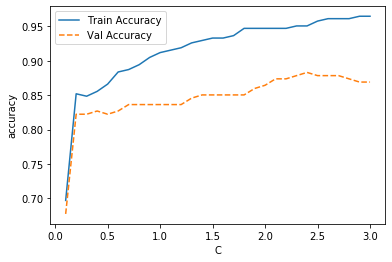

In [134]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, val_accuracy, linestyle="--", label="Val Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [135]:
#새로운 SVC 모델 파라미터 변경
#Gamma 훈련 샘플이 미치는 영향의 범위를 변경 결과
#train 및 test정확도 결과 저장용
train_accuracy=[];val_accuracy=[]
#gamma: 규제(0.01 , 0.1 , 1, 10)

para_gamma=[0.1 * gamma for gamma in range(1,11)]
# para_gamma=[10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C = 0.1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x,df_val_y))
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValAccuracy']=val_accuracy

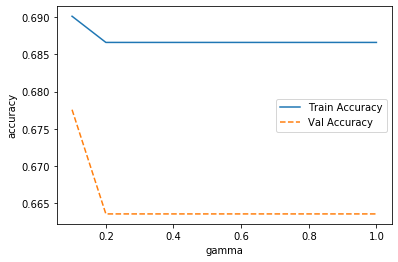

In [136]:
# 새로운 SVC 모델 평가

# Gamma 별 정확도 테이블
df_accuracy_gamma.round(3)
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, val_accuracy, linestyle = '--', label = 'Val Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

In [139]:
# 최종 모델 
svc_final = SVC(gamma = 0.1,C = 1.4, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.958
Accuracy on test set: 0.855 

Confusion matrix: 
 [[136   8]
 [ 23  47]]


In [138]:
# GridSearchCV 이용한 최적의 파라미터 찾기
estimator = SVC(random_state =1234)

param_grid = {"C" :para_c, "gamma":para_gamma}

grid_rf =GridSearchCV(estimator, param_grid,scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)

print("best estimator model :\n{}".format(grid_rf.best_estimator_))
print("\nbest paramator model :\n{}".format(grid_rf.best_params_))
print("\nbest score :\n{}".format(grid_rf.best_score_.round(3)))

best estimator model :
SVC(C=1.4000000000000001, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best paramator model :
{'C': 1.4000000000000001, 'gamma': 0.1}

best score :
0.831


서포트 벡터머신은 변수 중요도가 나오지 않음 